<a href="https://colab.research.google.com/github/fatima2020-lab/Simulacion-I/blob/main/Coss_BU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Flecha y Cojinetes**
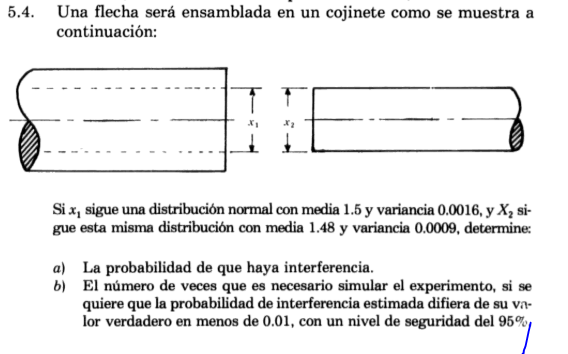

Metodología de la Simulación


***Solución Análitica***

**Paso 1:** Identificar las variables


*   $X_1\sim N(1.5, 0.04)$
*   $X_1\sim N(1.48, 0.03)$



**Paso 2:** Determinar la distribución de probabilidad


*   $x_1\sim f(x)=\frac{1}{(0.04)\sqrt{2π}}e^{-\frac{1}{2}\frac{(x-1.5)^2}{(0.04)^2}}$
*   $x_2\sim f(x)=\frac{1}{(0.03)\sqrt{2π}}e^{-\frac{1}{2}\frac{(x-1.48)^2}{(0.03)^2}}$



**Aplicando el Teorema de la suma de normales podemos obtener:**

 Calcular la media:
 $$
 μ_R = μ_2-μ_1
 $$

 $$
 \mu_R = -0.02
 $$

Calcular la varianza:
$$
σ_R=\sqrt{σ_1^2+σ_2^2}
$$

$$
σ_R=0.05
$$

Calcular la *probabilidad*, estandarizar con la tabla de distribución Z:

$$
P(X_1>X_2)=P(D>0)
$$

Aplicando la enstandarización:
$$
P(D > 0) = P\left( Z > \frac{0 - 0.02}{\sqrt{0.0025}} \right) = P(Z > -0.4)
$$

Usando la tabla de distribución normal estándar:


$$
P(Z > -0.4) = 1 - P(Z < -0.4) = 1 - 0.3446 = 0.6554
$$

Por lo tanto, la probabilidad de interferencia de manera analítica es:

$$
P(X_1 > X_2) \approx 0.6554
$$

**Paso 3:** Determinar la distribución Acumulativa.

$$
P(x_2-x_1\geq 0) = \int_{0}^{x_2-x_1}N(μ_R,σ_R)dx
$$

***Solución por Simulación:***


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random as rd
from scipy.stats import norm

In [2]:
def cojinete(n):
    exitos = 0
    for i in range(n):
        x1 = np.random.normal(1.5, 0.04)    # Numeros aleatorios X1 - U(0,1)
        x2 = np.random.normal(1.48, 0.03)   # Numeros aleatorios X2 - U(0,1)
        if x1 > x2:
            exitos += 1
    prob = exitos / n
    return prob


a)

In [3]:
p = cojinete(10000)
print(f"Probabilidad estimada de interferencia: {p:.4f}")

Probabilidad estimada de interferencia: 0.6534


b)

In [6]:
#Usamos la formula del tamaño de muestra de proporciones:

def t_muestra(p, E, Z):
  n = (Z**2 * p * (1 - p)) / E**2
  return int(np.ceil(n))

In [7]:
#p: es nuestra Probabilidad que obtuvimos en el inciso anterior
#E: es el error deseado
#Z: valor de la tabla de distribución tomandonun 95% de seguridad = 1.96

n_necesario = t_muestra(p, 0.01, 1.96)
print(f"Número de simulaciones necesarias: {n_necesario}")

Número de simulaciones necesarias: 8701


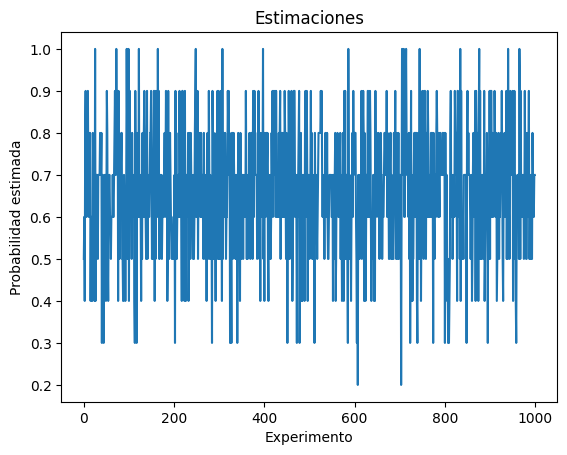

In [8]:
#Graficamos los intentos anteriores
def muestra(m=1000, n=10):
    lista = []
    for i in range(m):
        Coj = cojinete(n)
        lista.append(Coj)
    return lista

# Definimos nuestras simulaciones
m = muestra(m=1000, n=10)

# Graficamos la distribución
plt.plot(m)
plt.title("Estimaciones")
plt.xlabel("Experimento")
plt.ylabel("Probabilidad estimada")
plt.show()